In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys, os, logging, timeit, glob
from pathlib import Path as Pathlb


from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import itertools

import seaborn as sns

import matplotlib.pyplot as plt

from statannot import add_stat_annotation

In [12]:
e_all = pd.read_excel(f'C:\\Project\\master-project\\results\\Balanced_all.xlsx')
e_all["neg_tr_ratio"] = "unbalanced"
for i in ["1", "2", "5", "10", "20", "50", "100"]:
    e1 = pd.read_excel(f'C:\\Project\\master-project\\results\\Balanced_{i}.xlsx')
    e_all = pd.concat((e_all, e1), axis=0)

e_all

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Project\\master-project\\results\\Balanced_all.xlsx'

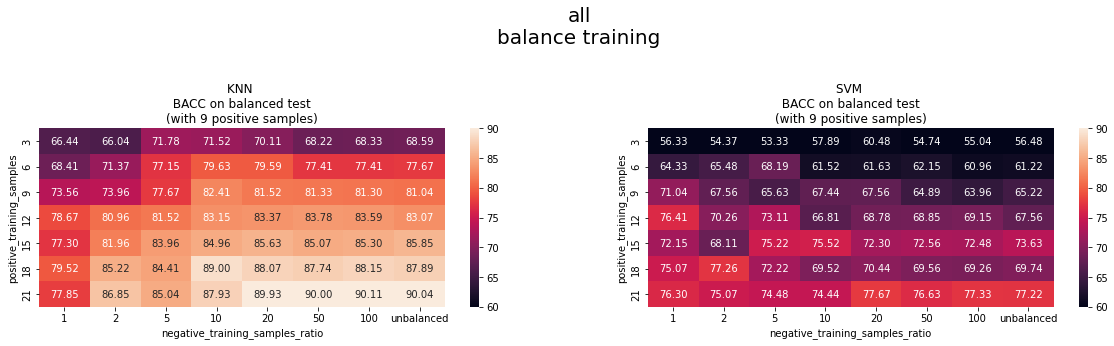

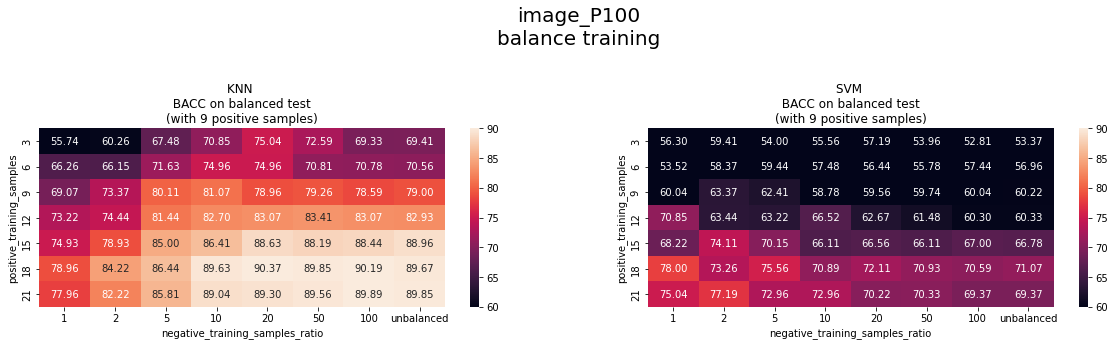

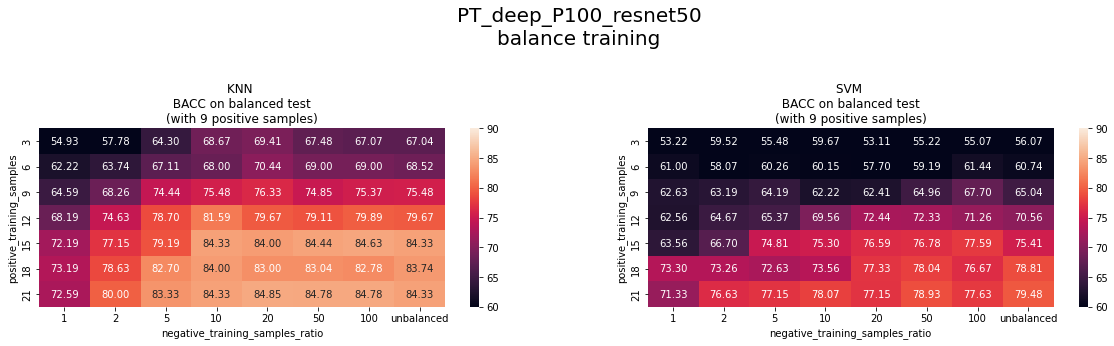

In [ ]:
e = e_all[e_all["pos_te_samples"]== 9]
a2 = 'negative_training_samples_ratio'
a1 = 'positive_training_samples'
v=[[60, 90],
   [50, 80],
   [50, 100],]


for z, t in enumerate([ "all", "image_P100", "PT_deep_P100_resnet50"]):#  "all", "image_P100", "PT_deep_P100_resnet50"
    i=1
    plt.figure(figsize=(20,13)).suptitle(f"{t}\nbalance training", fontsize=20)
    plt.subplots_adjust(hspace=0.4, top=0.85,) 

    for x, b in enumerate(["BACC_bd",]):#  "ACC%",  "BACC%",  "mean(EER)",  "FAR(FPR)",  "FRR(FNR)"
        df_all = e[e["feature_type"]== t]
        df_all = df_all[[b, "clasifier", "pos_tr_samples", "neg_tr_ratio"]]
        df_all.columns = [b, "clasifier", "positive_training_samples", "negative_training_samples_ratio"]
        
        C = df_all.groupby(['clasifier', a1, a2]).mean()
        for y,c in enumerate(["KNN", "SVM",]):
            
            plt.subplot(3,2,i)
            title = ["BACC on balanced test \n(with 9 positive samples)",  "BACC on unbalanced test", "ACC on unbalanced test"]
            plt.title(f"{c} \n {title[x]}")
            i = i+1
            sns.heatmap(C.unstack().loc[c,b], annot=True, fmt=".2f", vmin=v[x][0], vmax=v[x][1])


            # labels = [b[1] for b in C.unstack().columns]
            # plt.plot(C.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c} \n {title[x]}")
            # plt.legend(title=a2)
            # plt.xlabel(a1)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])
            # plt.xticks(ticks=[3,6,9,12,15,18,21])



In [ ]:
e = pd.read_excel(f'C:\\Project\\master-project\\results\\Mode2\\Result_all_Mode_2A.xlsx')
e1 = pd.read_excel(f'C:\\Project\\master-project\\results\\Mode2\\Result_all_Mode_2B.xlsx')
e2 = pd.read_excel(f'C:\\Project\\master-project\\results\\Mode2\\Result_all_Mode_2C.xlsx')
e3 = pd.read_excel(f'C:\\Project\\master-project\\results\\Mode2\\Result_all_Mode_2D.xlsx')

e_all = pd.concat([e,e1,e3,e2], axis=0)
e_all

,Unnamed: 0,testID,subject ID,direction,clasifier,PCA,num_pc,classifier_parameters,normilizing,feature_type,...,FRR_ud,CM_bd,CM_ud,pos_tr_samples,neg_tr_ratio,pos_te_samples,neg_te_samples,known_imposter,unknown_imposter,unknown_imposter_samples
0,0,3680377,4,both,TM,0.95,20,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.000000,[[13. 17.]\n [ 0. 30.]],[[38. 53.8]\n [ 0. 3. ]],3,2,2,94,30,0,0
1,1,3680377,5,both,TM,0.95,19,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.020000,[[22.7 31.3]\n [ 1. 53. ]],[[37.2 52.2]\n [ 0.1 5.3]],3,2,2,94,30,0,0
2,2,3680377,6,both,TM,0.95,17,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.016667,[[29.5 23.5]\n [ 1. 52. ]],[[47.4 42.1]\n [ 0.1 5.2]],3,2,2,94,30,0,0
3,3,3680377,7,both,TM,0.95,16,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.033333,[[12.2 17.8]\n [ 1. 29. ]],[[35. 56.8]\n [ 0.1 2.9]],3,2,2,94,30,0,0
4,4,3680377,8,both,TM,0.95,20,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.100000,[[ 9.4 20.6]\n [ 3. 27. ]],[[29.2 62.6]\n [ 0.3 2.7]],3,2,2,94,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,25,3596462240610,35,both,TM,0.95,52,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.166667,[[24. 6.]\n [ 5. 25.]],[[69.1 22.7]\n [ 0.5 2.5]],15,2,30,94,30,0,0
1316,26,3596462240610,36,both,TM,0.95,54,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.125000,[[25.2 5.8]\n [ 4. 27. ]],[[77.5 14.2]\n [ 0.4 2.7]],15,2,30,94,30,0,0
1317,27,3596462240610,38,both,TM,0.95,54,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.466667,[[17.5 12.5]\n [14. 16. ]],[[52.8 39. ]\n [ 1.4 1.6]],15,2,30,94,30,0,0
1318,28,3596462240610,39,both,TM,0.95,50,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.333333,[[22.3 7.7]\n [10. 20. ]],[[69.9 21.9]\n [ 1. 2. ]],15,2,30,94,30,0,0


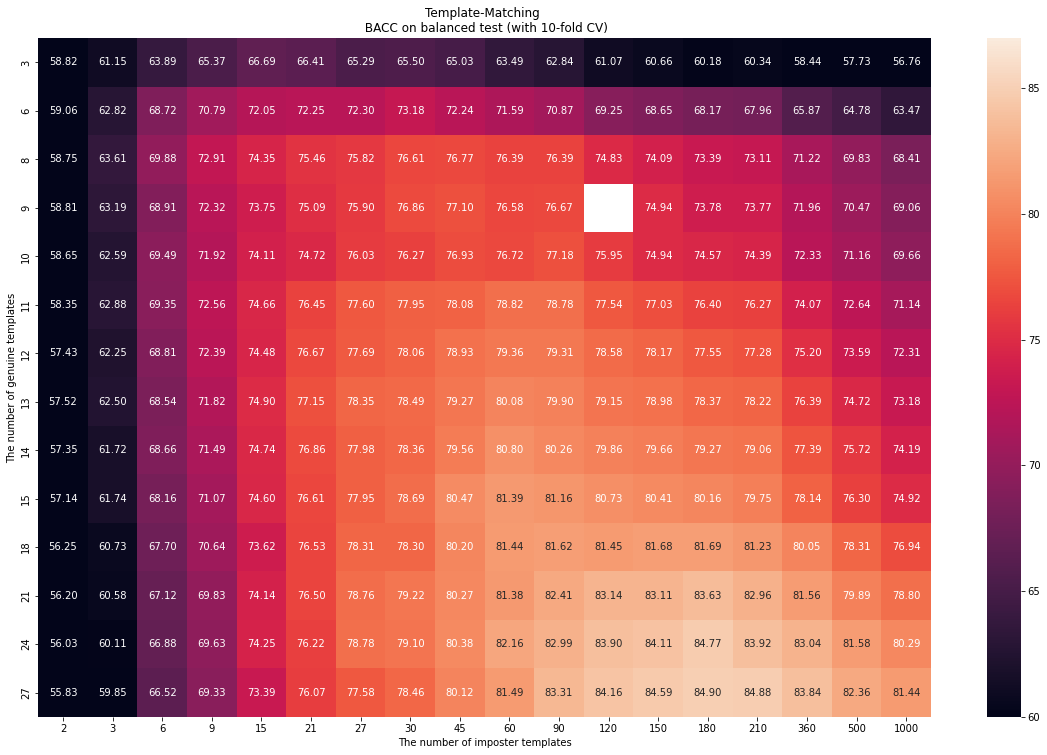

In [ ]:
e = pd.read_excel(f'C:\\Project\\master-project\\results\\Mode2\\Result_all_Mode_2A.xlsx')
e1 = pd.read_excel(f'C:\\Project\\master-project\\results\\Mode2\\Result_all_Mode_2B.xlsx')
e2 = pd.read_excel(f'C:\\Project\\master-project\\results\\Mode2\\Result_all_Mode_2C.xlsx')
e3 = pd.read_excel(f'C:\\Project\\master-project\\results\\Mode2\\Result_all_Mode_2D.xlsx')

e = pd.concat([e,e1,e3,e2], axis=0)


a2 = 'The number of imposter templates'
a1 = 'The number of genuine templates'
v=[[60, 87],
   [50, 80],
   [50, 100],]


for z, t in enumerate([ "all"]):#  "all", "image_P100", "PT_deep_P100_resnet50"
    i=2
    plt.figure(figsize=(20,13))#.suptitle(f"{t}", fontsize=20)
    plt.subplots_adjust(hspace=0.4, top=0.85,) 

    for x, b in enumerate(["BACC_bd",]):#  "ACC%",  "BACC%",  "mean(EER)",  "FAR(FPR)",  "FRR(FNR)"
        df_all = e[e["feature_type"]== t]
        df_all = df_all[[b, "clasifier", "pos_tr_samples", "test_ratio"]]
        df_all.columns = [b, "clasifier", "The number of genuine templates", "The number of imposter templates"]
        
        C = df_all.groupby(['clasifier', a1, a2]).mean()
        C1 = df_all.groupby(['clasifier', a2, a1]).mean()
        for y,c in enumerate([ "TM",]):#  "KNN-5", "KNN-7", "KNN-9",]):
            
            # plt.subplot(3,2,i)
            title = ["BACC on balanced test (with 10-fold CV)",  "BACC on unbalanced test", "ACC on unbalanced test"]
            plt.title(f"Template-Matching \n {title[x]}")

            plt.ylabel("The number of genuine templates")
            plt.xlabel("ratio of the number of imposter templates over\n the number of genuine templates")
            
            sns.heatmap(C.unstack().loc[c,b], annot=True, fmt=".2f", vmin=v[x][0], vmax=v[x][1])

            # plt.subplot(3,3,i+3)

            # labels = [b[1] for b in C.unstack().columns]
            # plt.plot(C.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c}")
            # plt.legend(title=a2)
            # plt.xlabel(a1)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27])

            # plt.subplot(3,3,i+6)

            # labels = [b[1] for b in C1.unstack().columns]
            # plt.plot(C1.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c}")
            # plt.legend(title=a1)
            # plt.xlabel(a2)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])
            # plt.xticks(ticks=[1,2,5,10,20,50,100])
            
            i = i+1

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6 v.s. 8: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.383e-09 U_stat=1.127e+05
9 v.s. 10: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.349e+05
11 v.s. 12: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.425e+05
13 v.s. 14: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.430e+05
15 v.s. 18: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.425e+05
21 v.s. 24: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.417e+05
3 v.s. 6: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.304e-29 U_stat=8.674e+04
8 v.s. 9: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correcti

(<AxesSubplot:xlabel='The number of imposter templates', ylabel='BACC_bd'>,
  <statannot.StatResult.StatResult at 0x17cb73195b0>])

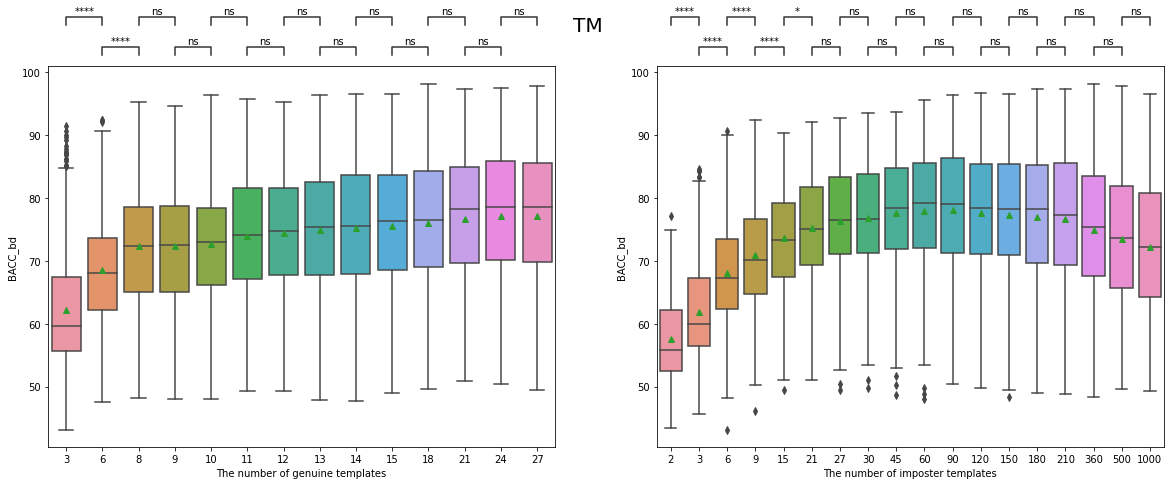

In [ ]:
d = "TM"
df_all = e
df_all = df_all[df_all["clasifier"]== d]
df_all = df_all[[b, "clasifier", "pos_tr_samples", "test_ratio"]]
df_all.columns = [b, "clasifier", "The number of genuine templates", "The number of imposter templates"]

# df_all = df_all[[b, "clasifier", "pos_tr_samples", "neg_tr_ratio"]]
# df_all.columns = [b, "clasifier", "positive_training_samples", "ratio"]# a2 = 'ratio'
# print(df_all)
# a1 = 'positive_training_samples'

y = "BACC_bd"

x = "The number of genuine templates"
# hue = "clasifier"
box_pairs=[
    (6,8),
    
    (9,10),
    (11,12),
    (13,14),
    (15,18),
    (21,24),
    (3,6),
    (8,9),
    (10,11),
    (12,13),
    (14,15),
    (18,21),
    (24,27),
    ]

plt.figure(figsize=(20,7)).suptitle(f"{d}", fontsize=20)
plt.subplot(1,2,1)
# plt.title(data.iloc[1, 3])
ax = sns.boxplot(data=df_all, y=y,  x=x, showmeans=True,)

add_stat_annotation(ax, data=df_all, y=y, x=x,# hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


plt.subplot(1,2,2)
x = "The number of imposter templates"
# hue = "clasifier"
box_pairs=[
    (3,6),
    
    (9,15),
    (21,27),
    (30,45),
    (60,90),
    (120,150),
    (180,210),
    (360,500),
    (2,3),
    (6,9),
    (15,21),
    (27,30),
    (45,60),
    (90,120),
    (150,180),
    (210,360),
    (500,1000),
    ]
# box_pairs=[
#     (6,9),
#     (12,15),
#     (18,21),
#     (24,27),
#     # (3,6),
#     (9,12),
#     (15,18),
#     (21,24),
#     ]

ax = sns.boxplot(data=df_all, y=y,  x=x, showmeans=True,)

add_stat_annotation(ax, data=df_all, y=y, x=x,# hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)        

In [ ]:
############################################################################################################################################################################################
############################################################################################################################################################################################
# different K
e_all = pd.read_excel(f'C:\\Project\\master-project\\results\\knn 1 3\\Result_all_Mode_3.xlsx')
e_all1 = pd.read_excel(f'C:\\Project\\master-project\\results\\knn 1 3\\Result_all_Mode_1.xlsx')

e_all = pd.concat([e_all,e_all1], axis=0)
e_all["clasifier"] = e_all["classifier_parameters"].map(lambda x: "KNN-"+str(x[16:17]))

e_all2 = pd.read_excel(f'C:\\Project\\master-project\\results\\knn 1 3\\Result.xlsx')
e_all2["clasifier"] = e_all2["clasifier"].map(lambda x: "KNN-1" if x=="TM" else "KNN-3")

e_all = pd.concat([e_all,e_all2], axis=0)




In [ ]:
e_all

,Unnamed: 0,testID,subject ID,direction,clasifier,PCA,num_pc,classifier_parameters,normilizing,feature_type,...,FRR_ud,CM_bd,CM_ud,pos_tr_samples,neg_tr_ratio,pos_te_samples,neg_te_samples,known_imposter,unknown_imposter,unknown_imposter_samples
0,0,3267745326471,4,both,KNN-5,0.95,56,"{'n_neighbors': 5, 'random_runs': 10, 'metric'...",z-score,all,...,0.066667,[[26.7 3.3]\n [ 2. 28. ]],[[78.8 13. ]\n [ 0.2 2.8]],24,1,5,94,30,0,0
1,1,3267745326471,5,both,KNN-5,0.95,50,"{'n_neighbors': 5, 'random_runs': 10, 'metric'...",z-score,all,...,0.060000,[[45.1 8.9]\n [ 3. 51. ]],[[75.6 13.8]\n [ 0.3 5.1]],24,1,5,94,30,0,0
2,2,3267745326471,6,both,KNN-5,0.95,51,"{'n_neighbors': 5, 'random_runs': 10, 'metric'...",z-score,all,...,0.100000,[[49.2 3.8]\n [ 5. 48. ]],[[84.1 5.4]\n [ 0.5 4.8]],24,1,5,94,30,0,0
3,3,3267745326471,7,both,KNN-5,0.95,51,"{'n_neighbors': 5, 'random_runs': 10, 'metric'...",z-score,all,...,0.100000,[[26.3 3.7]\n [ 3. 27. ]],[[80.2 11.6]\n [ 0.3 2.7]],24,1,5,94,30,0,0
4,4,3267745326471,8,both,KNN-5,0.95,55,"{'n_neighbors': 5, 'random_runs': 10, 'metric'...",z-score,all,...,0.133333,[[22.2 7.8]\n [ 4. 26. ]],[[68.6 23.2]\n [ 0.4 2.6]],24,1,5,94,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,25,10447630,35,both,KNN-3,0.95,65,"{'n_neighbors': 3, 'random_runs': 10, 'metric'...",z-score,all,...,0.133333,[[27.5 2.5]\n [ 4. 26. ]],[[85.1 6.7]\n [ 0.4 2.6]],27,100,5,94,30,0,0
3776,26,10447630,36,both,KNN-3,0.95,65,"{'n_neighbors': 3, 'random_runs': 10, 'metric'...",z-score,all,...,0.075000,[[29.1 1.9]\n [ 3. 28. ]],[[86.7 5. ]\n [ 0.3 2.8]],27,100,5,94,30,0,0
3777,27,10447630,38,both,KNN-3,0.95,65,"{'n_neighbors': 3, 'random_runs': 10, 'metric'...",z-score,all,...,0.466667,[[25.2 4.8]\n [14. 16. ]],[[80.1 11.7]\n [ 1.4 1.6]],27,100,5,94,30,0,0
3778,28,10447630,39,both,KNN-3,0.95,65,"{'n_neighbors': 3, 'random_runs': 10, 'metric'...",z-score,all,...,0.233333,[[27.5 2.5]\n [ 7. 23. ]],[[86. 5.8]\n [ 0.7 2.3]],27,100,5,94,30,0,0


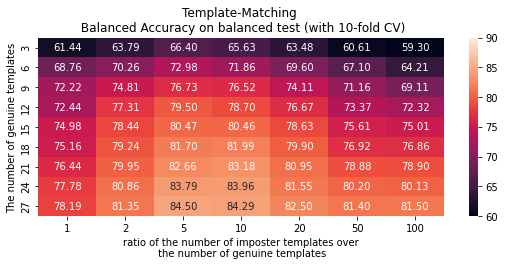

In [ ]:
e = e_all
a2 = 'ratio of the number of imposter templates over\n the number of genuine templates'
a1 = 'The number of genuine templates'
v=[[60, 90],
   [50, 80],
   [50, 100],]


for z, t in enumerate([ "all"]):#  "all", "image_P100", "PT_deep_P100_resnet50"
    i=2
    plt.figure(figsize=(20,13))#.suptitle(f"{t}", fontsize=20)
    plt.subplots_adjust(hspace=0.4, top=0.85,) 

    for x, b in enumerate(["BACC_bd",]):#  "ACC%",  "BACC%",  "mean(EER)",  "FAR(FPR)",  "FRR(FNR)"
        df_all = e[e["feature_type"]== t]
        df_all = df_all[[b, "clasifier", "pos_tr_samples", "neg_tr_ratio"]]
        df_all.columns = [b, "clasifier", "The number of genuine templates", "ratio of the number of imposter templates over\n the number of genuine templates"]
        
        C = df_all.groupby(['clasifier', a1, a2]).mean()
        C1 = df_all.groupby(['clasifier', a2, a1]).mean()
        for y,c in enumerate([ "KNN-1", "KNN-3", "KNN-5", "KNN-7", "KNN-9" ]):#  "KNN-5", "KNN-7", "KNN-9",]):
            
            plt.subplot(3,2,i)
            title = ["Balanced Accuracy on balanced test (with 10-fold CV)",  "BACC on unbalanced test", "ACC on unbalanced test"]
            plt.title(f"Template-Matching \n {title[x]}")

            plt.ylabel("The number of genuine templates")
            plt.xlabel("ratio of the number of imposter templates over\n the number of genuine templates")
            
            sns.heatmap(C.unstack().loc[c,b], annot=True, fmt=".2f", vmin=v[x][0], vmax=v[x][1])

            # plt.subplot(3,3,i+3)

            # labels = [b[1] for b in C.unstack().columns]
            # plt.plot(C.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c}")
            # plt.legend(title=a2)
            # plt.xlabel(a1)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27])

            # plt.subplot(3,3,i+6)

            # labels = [b[1] for b in C1.unstack().columns]
            # plt.plot(C1.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c}")
            # plt.legend(title=a1)
            # plt.xlabel(a2)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])
            # plt.xticks(ticks=[1,2,5,10,20,50,100])
            break
            i = i+1


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2 v.s. 5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.858e-02 U_stat=2.478e+04
10 v.s. 20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.744e+04
50 v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.885e+04
1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.901e-02 U_stat=2.478e+04
20 v.s. 50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.140e-01 U_stat=2.619e+04
5 v.s. 10: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.027e-02 U_stat=2.489e+04
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6 v.s. 9: Mann-W

(<AxesSubplot:xlabel='positive_training_samples', ylabel='BACC_bd'>,
  <statannot.StatResult.StatResult at 0x17cb292daf0>])

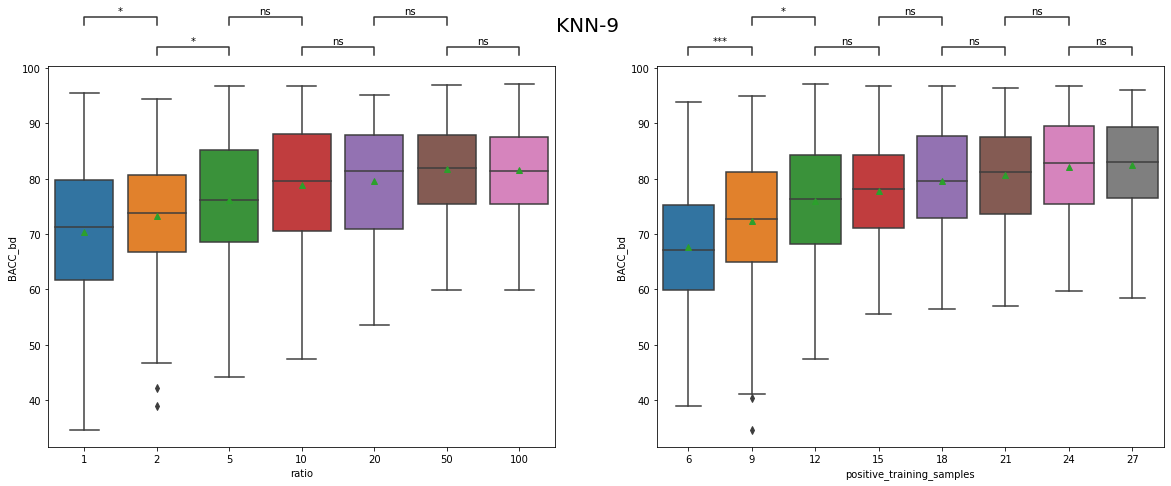

In [ ]:
e = e_all
d = "KNN-"
df_all = e[e["feature_type"]== t]
df_all = df_all[df_all["clasifier"]== d]
df_all = df_all[[b, "clasifier", "pos_tr_samples", "neg_tr_ratio"]]
df_all.columns = [b, "clasifier", "positive_training_samples", "ratio"]# a2 = 'ratio'
# print(df_all)
# a1 = 'positive_training_samples'

y = "BACC_bd"

x = "ratio"
# hue = "clasifier"
box_pairs=[
    (2,5),
    (10,20),
    (50,100),
    (1,2),
    (20,50),
    (5,10),
    ]

plt.figure(figsize=(20,7)).suptitle(f"{d}", fontsize=20)
plt.subplot(1,2,1)
# plt.title(data.iloc[1, 3])
ax = sns.boxplot(data=df_all, y=y,  x=x, showmeans=True,)

add_stat_annotation(ax, data=df_all, y=y, x=x,# hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


plt.subplot(1,2,2)
x = "positive_training_samples"
# hue = "clasifier"
box_pairs=[
    (6,9),
    (12,15),
    (18,21),
    (24,27),
    # (3,6),
    (9,12),
    (15,18),
    (21,24),
    ]

ax = sns.boxplot(data=df_all, y=y,  x=x, showmeans=True,)

add_stat_annotation(ax, data=df_all, y=y, x=x,# hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)                   

In [ ]:
e = pd.read_excel(f'C:\\Project\\master-project\\results\\Mode2\\Result_all_Mode_2A.xlsx')

e

,Unnamed: 0,testID,subject ID,direction,clasifier,PCA,num_pc,classifier_parameters,normilizing,feature_type,...,FRR_ud,CM_bd,CM_ud,pos_tr_samples,neg_tr_ratio,pos_te_samples,neg_te_samples,known_imposter,unknown_imposter,unknown_imposter_samples
0,0,3680377,4,both,TM,0.95,20,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.000000,[[13. 17.]\n [ 0. 30.]],[[38. 53.8]\n [ 0. 3. ]],3,2,2,94,30,0,0
1,1,3680377,5,both,TM,0.95,19,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.020000,[[22.7 31.3]\n [ 1. 53. ]],[[37.2 52.2]\n [ 0.1 5.3]],3,2,2,94,30,0,0
2,2,3680377,6,both,TM,0.95,17,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.016667,[[29.5 23.5]\n [ 1. 52. ]],[[47.4 42.1]\n [ 0.1 5.2]],3,2,2,94,30,0,0
3,3,3680377,7,both,TM,0.95,16,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.033333,[[12.2 17.8]\n [ 1. 29. ]],[[35. 56.8]\n [ 0.1 2.9]],3,2,2,94,30,0,0
4,4,3680377,8,both,TM,0.95,20,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.100000,[[ 9.4 20.6]\n [ 3. 27. ]],[[29.2 62.6]\n [ 0.3 2.7]],3,2,2,94,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,25,3520850,35,both,TM,0.95,64,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.566667,[[29.7 0.3]\n [17. 13. ]],[[90.8 1. ]\n [ 1.7 1.3]],9,2,1000,94,30,0,0
1586,26,3520850,36,both,TM,0.95,65,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.541667,[[30.5 0.5]\n [17. 14. ]],[[90.3 1.4]\n [ 1.7 1.4]],9,2,1000,94,30,0,0
1587,27,3520850,38,both,TM,0.95,65,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.900000,[[28.6 1.4]\n [27. 3. ]],[[89. 2.8]\n [ 2.7 0.3]],9,2,1000,94,30,0,0
1588,28,3520850,39,both,TM,0.95,65,"{'mode': 'dist', 'criteria': 'min', 'metric': ...",z-score,all,...,0.533333,[[30. 0.]\n [16. 14.]],[[91.4 0.4]\n [ 1.6 1.4]],9,2,1000,94,30,0,0


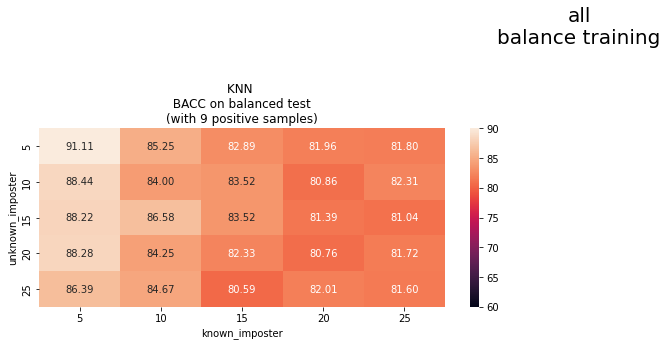

In [ ]:
e = pd.read_excel(f'C:\\Project\\master-project\\results\\imposters.xlsx')


a2 = 'known_imposter'
a1 = 'unknown_imposter'
v=[[60, 90],
   [50, 80],
   [50, 100],]


for z, t in enumerate([ "all"]):#  "all", "image_P100", "PT_deep_P100_resnet50"
    i=1
    plt.figure(figsize=(20,13)).suptitle(f"{t}\nbalance training", fontsize=20)
    plt.subplots_adjust(hspace=0.4, top=0.85,) 

    for x, b in enumerate(["BACC_bd",]):#  "ACC%",  "BACC%",  "mean(EER)",  "FAR(FPR)",  "FRR(FNR)"
        df_all = e[e["feature_type"]== t]
        df_all = df_all[[b, "clasifier", "known_imposter", "unknown_imposter"]]
        # df_all.columns = [b, "clasifier", "positive_training_samples", "negative_training_samples_ratio"]
        
        C = df_all.groupby(['clasifier', a1, a2]).mean()
        for y,c in enumerate(["KNN"]):
            
            plt.subplot(3,2,i)
            title = ["BACC on balanced test \n(with 9 positive samples)",  "BACC on unbalanced test", "ACC on unbalanced test"]
            plt.title(f"{c} \n {title[x]}")
            i = i+1
            sns.heatmap(C.unstack().loc[c,b], annot=True, fmt=".2f", vmin=v[x][0], vmax=v[x][1])

In [ ]:
e = pd.read_excel(f'C:\\Project\\master-project\\results\\Result__Test_1.xlsx')

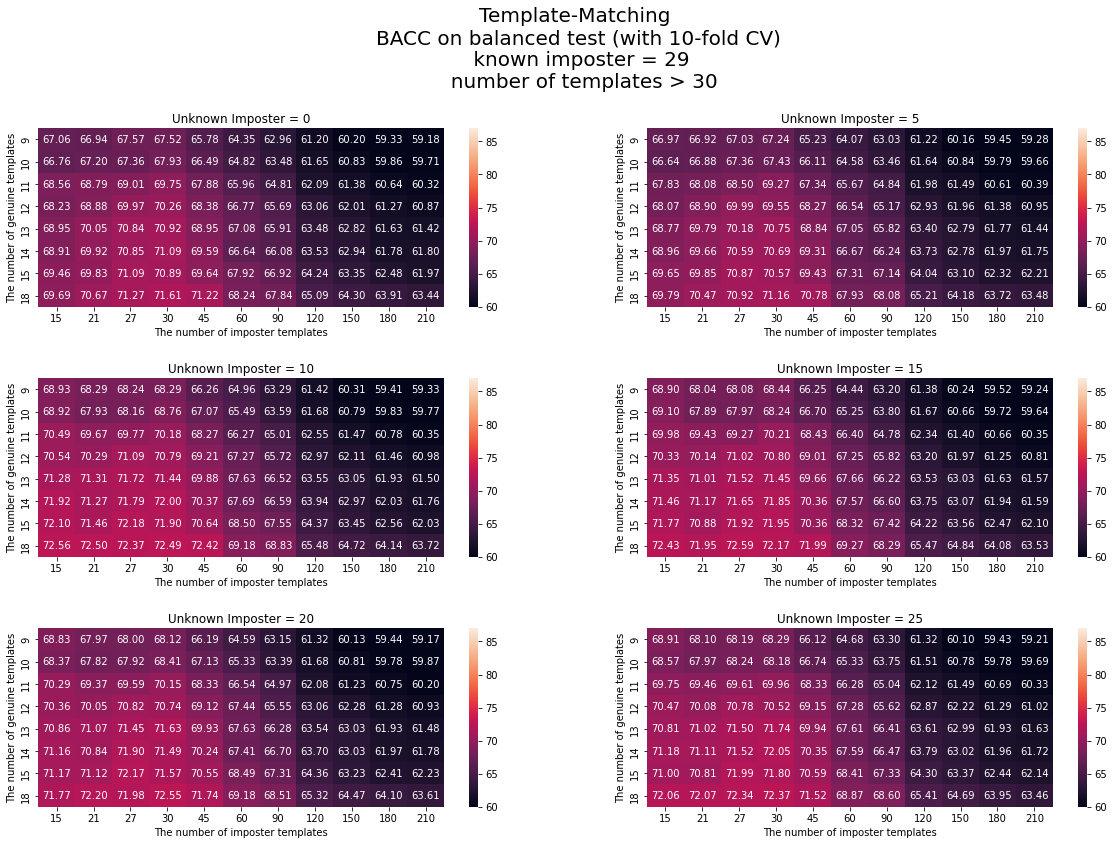

In [ ]:
a2 = 'The number of imposter templates'
a1 = 'The number of genuine templates'
v=[[60, 87],
   [50, 80],
   [50, 100],]

plt.figure(figsize=(20,13)).suptitle("Template-Matching \nBACC on balanced test (with 10-fold CV)\n known imposter = 29\n  number of templates > 30", fontsize=20)
plt.subplots_adjust(hspace=0.4, top=0.85,) 
i=1

for z, t in enumerate([ 0, 5, 10, 15, 20, 25]):#  "all", "image_P100", "PT_deep_P100_resnet50"
    for x, b in enumerate(["ACC_bd",]):#  "ACC%",  "BACC%",  "mean(EER)",  "FAR(FPR)",  "FRR(FNR)"
        df_all = e[e["unknown_imposter"]== t]
        df_all = df_all[[b, "classifier_name", "p_training_samples",	"train_ratio"]]
        df_all.columns = [b, "classifier_name", "The number of genuine templates", "The number of imposter templates"]
        
        C = df_all.groupby(['classifier_name', a1, a2]).mean()
        C1 = df_all.groupby(['classifier_name', a2, a1]).mean()
        for y,c in enumerate([ "TM",]):#  "KNN-5", "KNN-7", "KNN-9",]):
            
            plt.subplot(3,2,i)
            title = ["BACC on balanced test (with 10-fold CV)",  "BACC on unbalanced test", "ACC on unbalanced test"]
            plt.title(f"Unknown Imposter = {t}")

            plt.ylabel("The number of genuine templates")
            plt.xlabel("the number of known imposter templates")
            
            sns.heatmap(C.unstack().loc[c,b], annot=True, fmt=".2f", vmin=v[x][0], vmax=v[x][1])

            # plt.subplot(3,3,i+3)

            # labels = [b[1] for b in C.unstack().columns]
            # plt.plot(C.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c}")
            # plt.legend(title=a2)
            # plt.xlabel(a1)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27])

            # plt.subplot(3,3,i+6)

            # labels = [b[1] for b in C1.unstack().columns]
            # plt.plot(C1.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c}")
            # plt.legend(title=a1)
            # plt.xlabel(a2)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])
            # plt.xticks(ticks=[1,2,5,10,20,50,100])
            # break
            i = i+1

In [ ]:
y = "BACC_ud"
df_all = e
df_all = df_all[df_all["classifier_name"]== "TM"]
df_all = df_all[df_all["unknown_imposter"]== 0]
df_all = df_all[[y, "classifier_name", "p_training_samples", "train_ratio"]]
df_all.columns = [y, "classifier_name", "The number of genuine templates", "The number of imposter templates"]

df_all

,BACC_ud,classifier_name,The number of genuine templates,The number of imposter templates
0,65.877329,TM,9,15
1,79.046816,TM,9,15
2,85.038077,TM,9,15
3,74.853082,TM,9,15
4,79.770266,TM,9,15
...,...,...,...,...
15685,52.029782,TM,18,210
15686,71.128165,TM,18,210
15687,59.896878,TM,18,210
15688,63.236184,TM,18,210


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_m

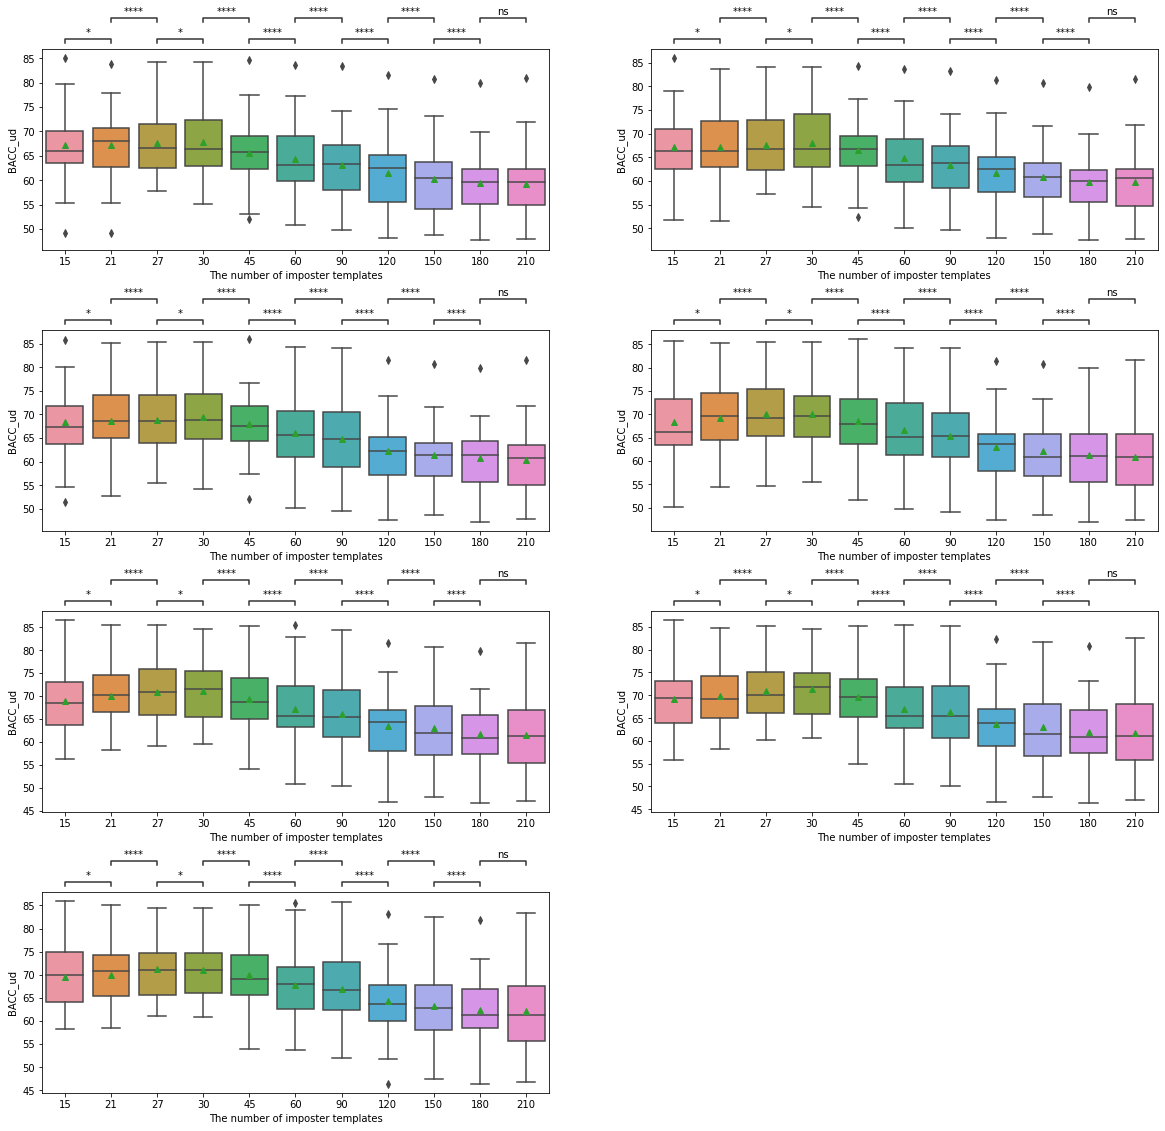

In [ ]:
import scipy.stats as stats
x = "The number of imposter templates"
plt.figure(figsize=(20,20))#.suptitle(f"{d}", fontsize=20)
plt.subplots_adjust(hspace=0.4, top=0.85,) 

rr=[]
for ind,i in enumerate([9, 10, 11, 12, 13, 14, 15]): # [15, 21, 27, 30, 45, 60, 90, 120, 150, 180, 210]
    plt.subplot(4,2,ind+1)

    box_pairs=[
        (15,21),
        (27,30),
        (45,60),
        (90,120),
        (150,180),

        (21,27),
        (30,45),
        (60,90),
        (120,150),
        (180,210),
        
        
        ]

    ax = sns.boxplot(data=df_all[df_all["The number of genuine templates"]== i], y=y,  x=x, showmeans=True,)

    ax1, test_result_list = add_stat_annotation(ax, data=df_all, y=y, x=x,# hue=hue, 
                            box_pairs=box_pairs,
                            test='Wilcoxon', text_format='star', loc='outside', verbose=-1)  
    rr.append([test_result_list[ii].pval for ii in range(len(test_result_list))])
    


<AxesSubplot:>

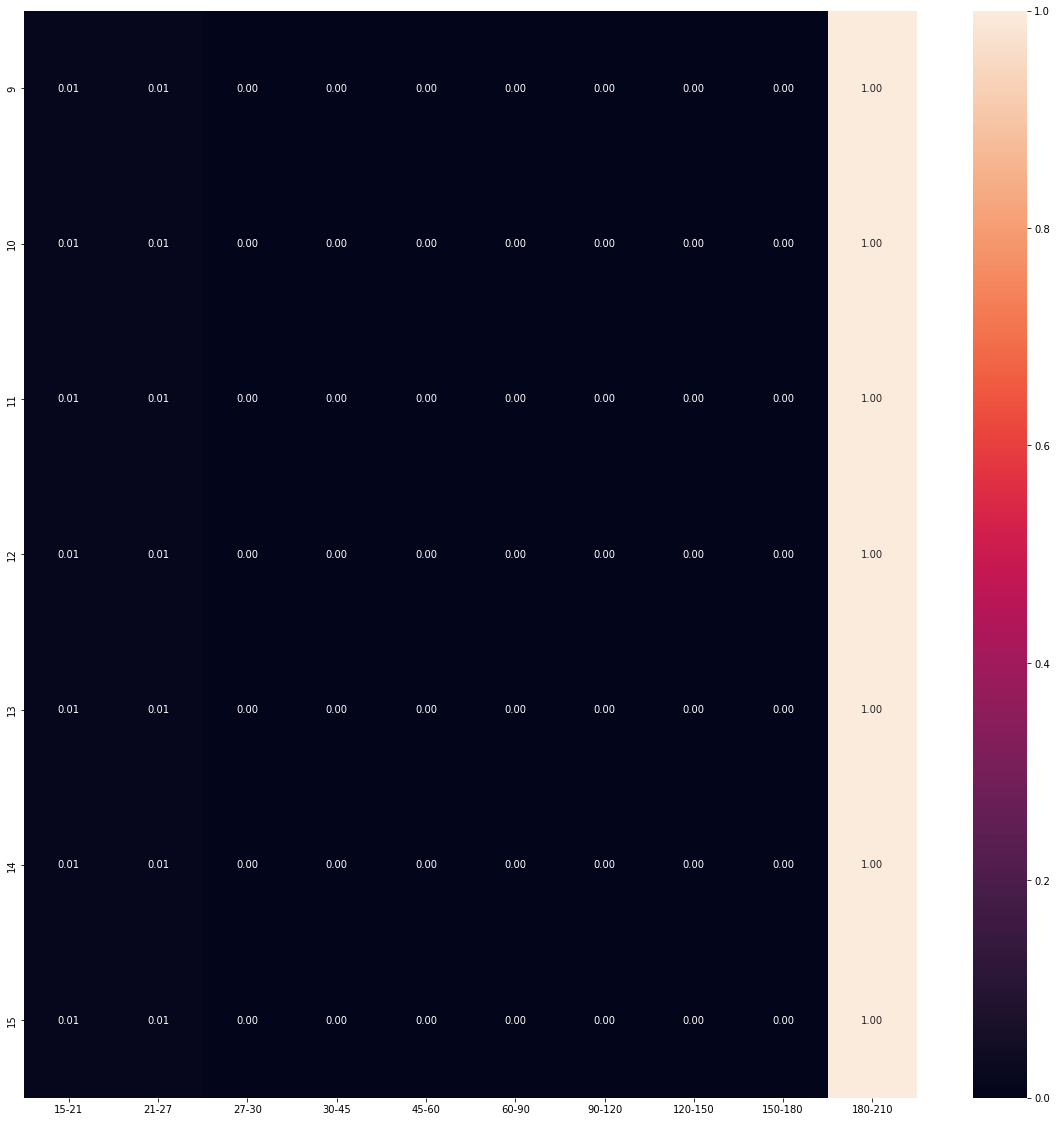

In [ ]:
ff = [15, 21, 27, 30, 45, 60, 90, 120, 150, 180, 210]
rr = pd.DataFrame(rr , index=[9, 10, 11, 12, 13, 14, 15], columns=[str(ff[i])+'-'+str(ff[i+1]) for i in range(10)])
plt.figure(figsize=(20,20))

sns.heatmap(rr, annot=True, fmt=".2f")

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_m

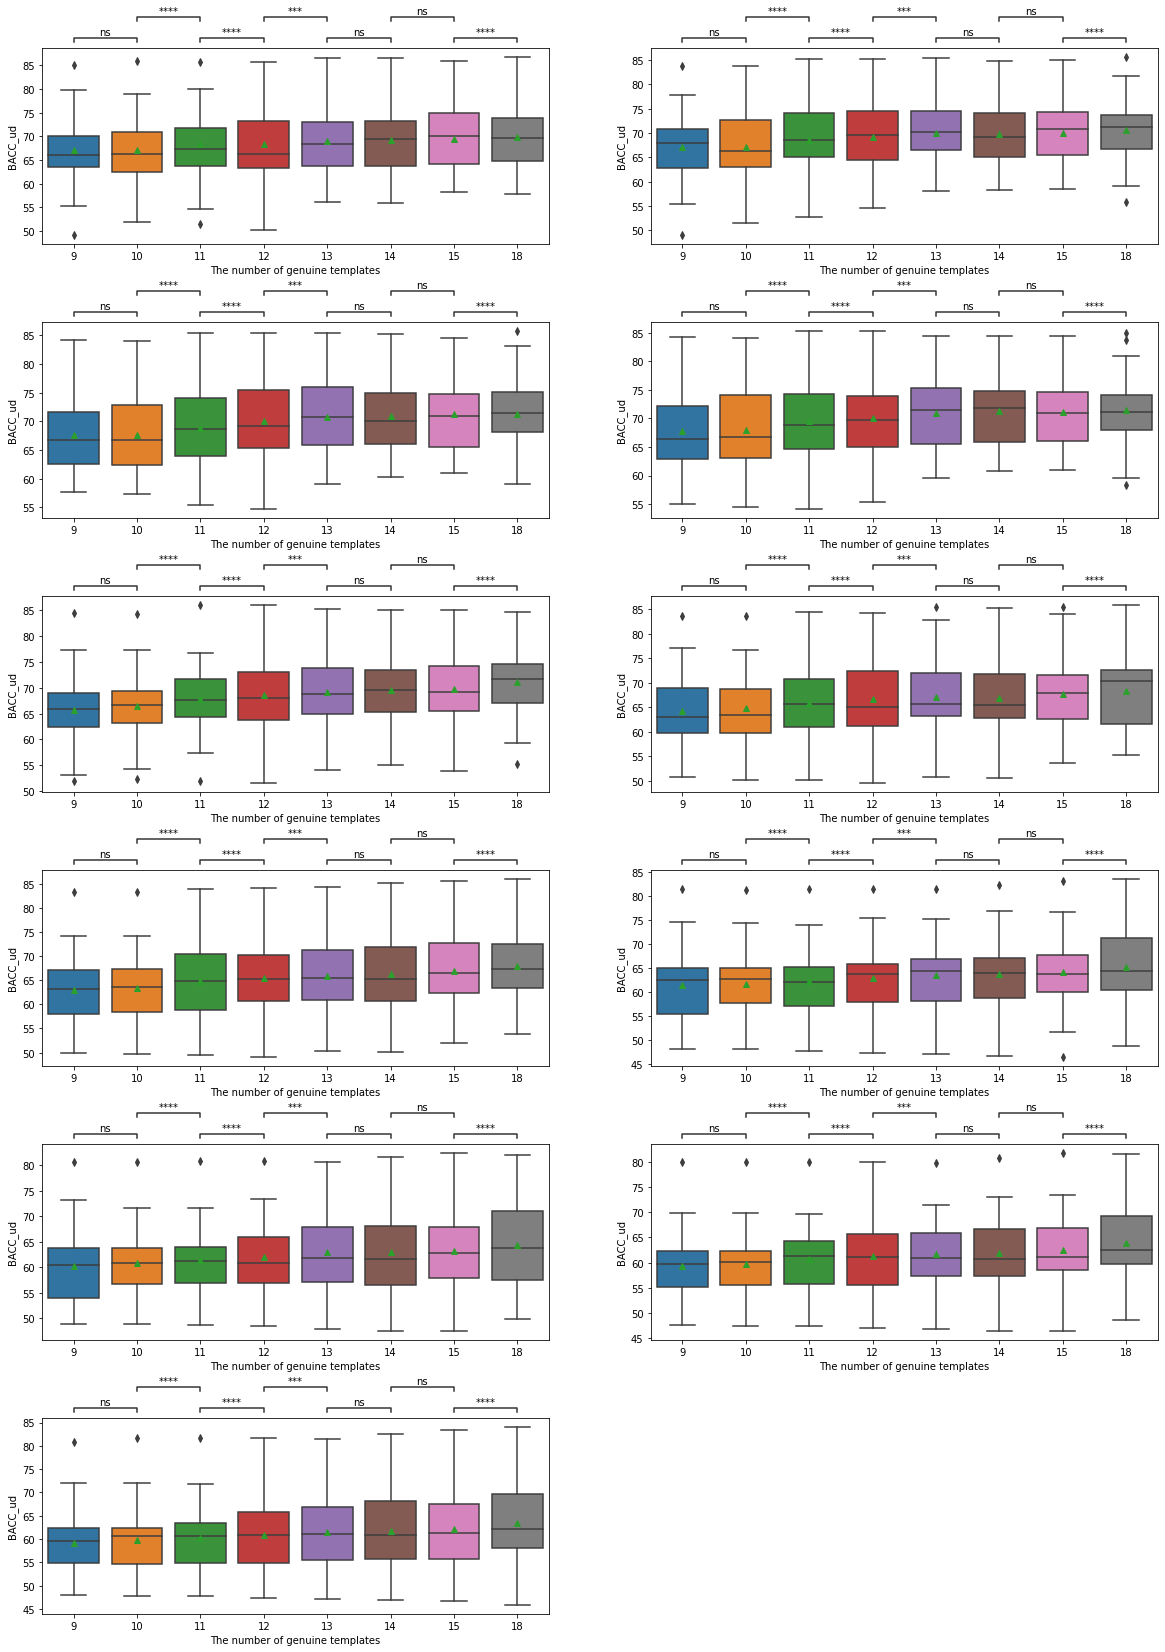

In [ ]:
x = "The number of genuine templates"
plt.figure(figsize=(20,30))#.suptitle(f"{d}", fontsize=20)
plt.subplots_adjust(hspace=0.4, top=0.85,) 

rr=[]
for ind,i in enumerate([15, 21, 27, 30, 45, 60, 90, 120, 150, 180, 210]): # 
    plt.subplot(6,2,ind+1)

    box_pairs=[
        (9,10),
        (11,12),
        (13,14),
         (15,18),



        (10,11),
        (12,13),
        (14,15),
       
        ]

    ax = sns.boxplot(data=df_all[df_all["The number of imposter templates"]== i], y=y,  x=x, showmeans=True,)

    ax1, test_result_list = add_stat_annotation(ax, data=df_all, y=y, x=x,# hue=hue, 
                            box_pairs=box_pairs,
                            test='Wilcoxon', text_format='star', loc='outside', verbose=0)  
    rr.append([test_result_list[ii].pval for ii in range(len(test_result_list))])


<AxesSubplot:>

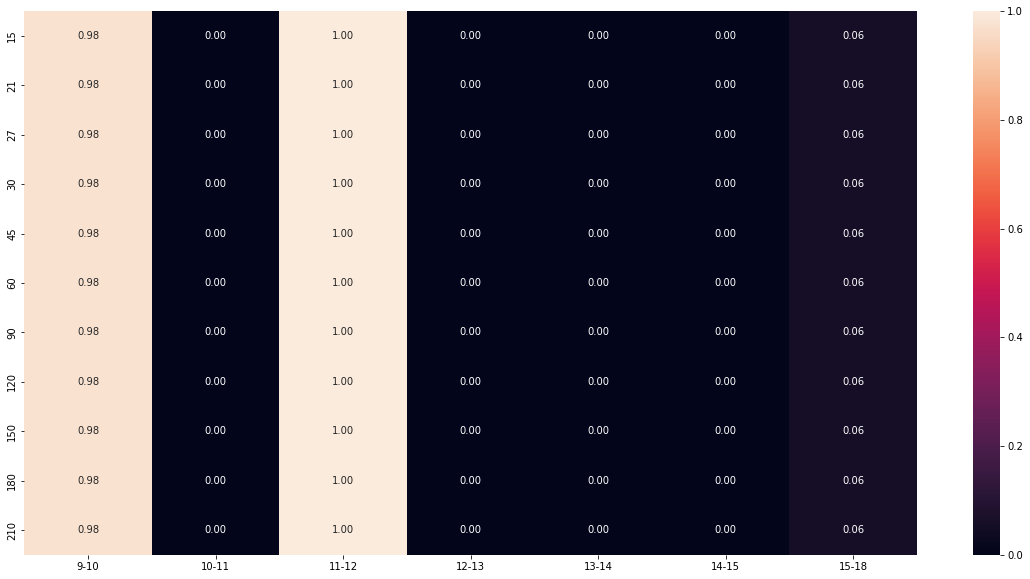

In [ ]:
ff = [9, 10, 11, 12, 13, 14, 15, 18] #15, 21, 27, 30, 45, 60, 90, 120, 150, 180, 210]
rr = pd.DataFrame(rr , index=[15, 21, 27, 30, 45, 60, 90, 120, 150, 180, 210], columns=[str(ff[i])+'-'+str(ff[i+1]) for i in range(7)])
plt.figure(figsize=(20,10))
sns.heatmap(rr, annot=True, fmt=".2f")

In [47]:
e = pd.read_excel(f'C:\\Project\\master-project\\results\\Result__Participant_Count_P1.xlsx')

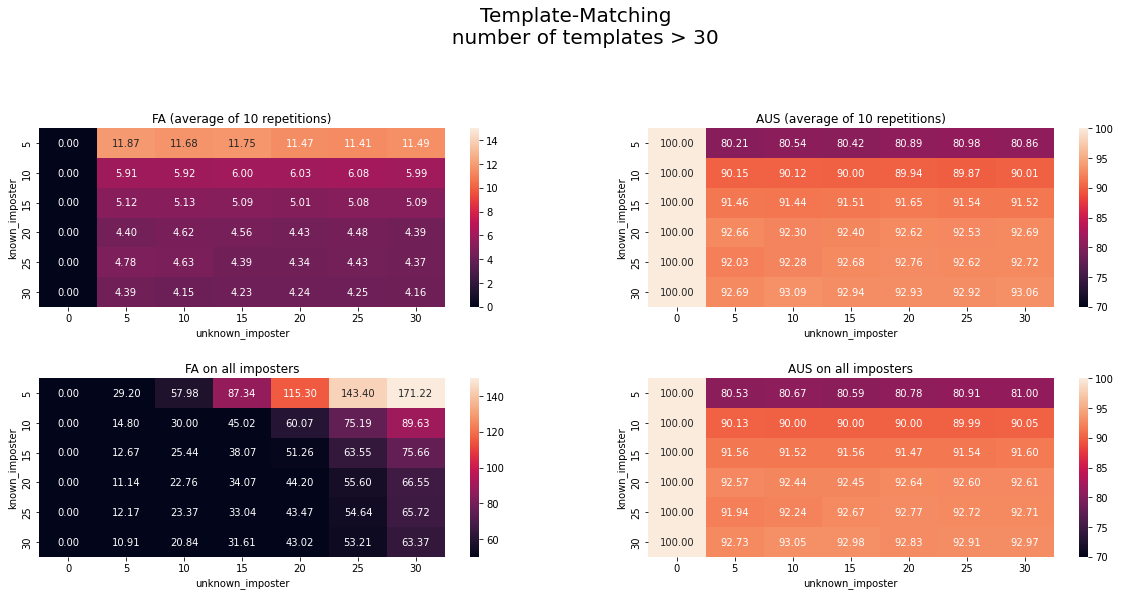

In [49]:
a1 = 'known_imposter'
a2 = 'unknown_imposter'
v=[[0, 15],
   [70, 100],
   [50, 150],
   [70, 100],]

plt.figure(figsize=(20,13)).suptitle("Template-Matching \n  number of templates > 30", fontsize=20)
plt.subplots_adjust(hspace=0.4, top=0.85,) 
i=1

for x, b in enumerate(["FAU", "AUS", "FAU_All", "AUS_All"]):#  "ACC%",  "BACC%",  "mean(EER)",  "FAR(FPR)",  "FRR(FNR)"
        df_all = e#[e["unknown_imposter"]== t]
        df_all = df_all[[b, "classifier_name", "known_imposter",	"unknown_imposter"]]
      #   df_all.columns = [b, "classifier_name", "The number of genuine templates", "The number of imposter templates"]
        
        C = df_all.groupby(['classifier_name', a1, a2]).mean()
        C1 = df_all.groupby(['classifier_name', a2, a1]).mean()
        for y,c in enumerate([ "TM",]):#  "KNN-5", "KNN-7", "KNN-9",]):
            
            plt.subplot(3,2,i)
            title = ["FA (average of 10 repetitions)", "AUS (average of 10 repetitions)", "FA on all imposters", "AUS on all imposters", "BACC on balanced test (with 10-fold CV)",  "BACC on unbalanced test", "ACC on unbalanced test"]
            plt.title(f"{title[i-1]}")

            plt.ylabel("The number of genuine templates")
            plt.xlabel("the number of known imposter templates")
            
            sns.heatmap(C.unstack().loc[c,b], annot=True, fmt=".2f", vmin=v[x][0], vmax=v[x][1])

            # plt.subplot(3,3,i+3)

            # labels = [b[1] for b in C.unstack().columns]
            # plt.plot(C.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c}")
            # plt.legend(title=a2)
            # plt.xlabel(a1)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27])

            # plt.subplot(3,3,i+6)

            # labels = [b[1] for b in C1.unstack().columns]
            # plt.plot(C1.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c}")
            # plt.legend(title=a1)
            # plt.xlabel(a2)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])
            # plt.xticks(ticks=[1,2,5,10,20,50,100])
            # break
            i = i+1

In [10]:
from sklearn import preprocessing as sk_preprocessing

scaling = sk_preprocessing.StandardScaler()


Scaled_train = scaling.fit_transform(e.iloc[:, :-1])
Scaled_test = scaling.transform(e.iloc[:, :-1])            

Scaled_train = pd.DataFrame(np.concatenate((Scaled_train, e.iloc[:, -1:].values), axis = 1))
Scaled_test  = pd.DataFrame(np.concatenate((Scaled_test,  e.iloc[:, -1:].values),  axis = 1))



In [21]:
Scaled_test.isnull().sum().sum()

0